In [127]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(r'C:\Users\pc\Desktop\cs229_ps1\src')

import util
from linear_model import LinearModel


x_train, y_train = util.load_dataset(r'C:\Users\pc\Desktop\cs229_ps1\data\ds4_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset(r'C:\Users\pc\Desktop\cs229_ps1\data\ds4_valid.csv', add_intercept=True)

In [128]:
class poisson(LinearModel):
    def __init__(self, stpsz=2e-7, eps=1e-6):
        self.alpha = stpsz
        self.eps = eps

    def h(self, theta, x):
        return np.exp(x @ theta) 

    def fit(self, x, y):
        m, n = x.shape

        theta=np.zeros(n)

        def next_step(theta):
            return (self.alpha / m) * x.T @ (y - self.h(theta, x))

        step = next_step(theta)
        while np.linalg.norm(step, 1) >= self.eps:
            theta += step
            step = next_step(theta)

        self.theta = theta

    def predict(self, x):
        return self.h(self.theta, x)


In [129]:
model = poisson(stpsz=2e-7, eps=1e-6)
model.fit(x_train,y_train)
print(np.mean(y_train==model.predict(x_train)))


0.0


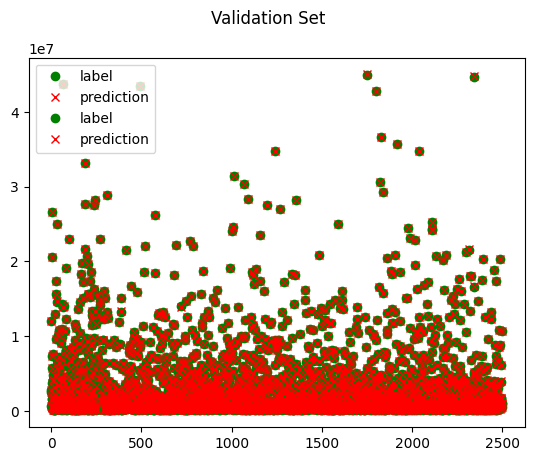

In [130]:
def plot(y_label, y_pred, title):
    plt.plot(y_label, 'go', label='label')
    plt.plot(y_pred, 'rx', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')
y_train_pred = model.predict(x_train)
plot(y_train, y_train_pred, 'Training Set')
y_valid_pred = model.predict(x_valid)
plot(y_valid, y_valid_pred, 'Validation Set')

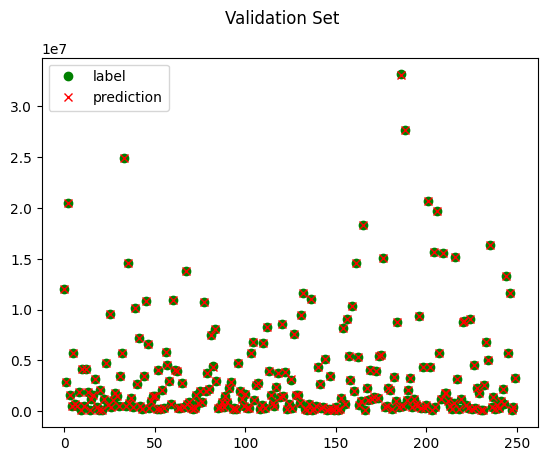

In [131]:
y_valid_pred = model.predict(x_valid)
plot(y_valid, y_valid_pred, 'Validation Set')